### Avacado Project
**Problem Statement:**<br>
Avocado is a fruit consumed by people heavily in the United States. 

**Content:**<br>
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. <br>

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. <br>

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. <br>

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.<br>

**Some relevant columns in the dataset:**<br>

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold


**Inspiration /Label**<br>

Your task is to make a model that can consider the data provided and predict the **Average Price.**


In [313]:
## Importing required liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [249]:
## Reading the dataset
data=pd.read_csv('avocado.csv')
## Saving a copy of the original dataset
data_copy=data

In [250]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [251]:
## Dropping 'Unnamed: 0' column
data=data.drop('Unnamed: 0',axis=1)

In [252]:
## Renaming the columns
data.rename(columns={'Total Volume':'TotalVol',
                   '4046':'PLU4046_Sales',
                   '4225':'PLU4225_Sales',
                  '4770':'PLU4770_Sales',
                  'Total Bags':'TotalBags',
                  'Small Bags':'SmallBags',
                  'Large Bags':'LargeBags',
                  'XLarge Bags':'XLargeBags',
                  'type':'Type','year':'Year','region':'Region'}, inplace=True)

In [253]:
data.columns

Index(['Date', 'AveragePrice', 'TotalVol', 'PLU4046_Sales', 'PLU4225_Sales',
       'PLU4770_Sales', 'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags',
       'Type', 'Year', 'Region'],
      dtype='object')

## Data Cleaning & EDA

In [254]:
data.shape

(18249, 13)

In [255]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           18249 non-null  object 
 1   AveragePrice   18249 non-null  float64
 2   TotalVol       18249 non-null  float64
 3   PLU4046_Sales  18249 non-null  float64
 4   PLU4225_Sales  18249 non-null  float64
 5   PLU4770_Sales  18249 non-null  float64
 6   TotalBags      18249 non-null  float64
 7   SmallBags      18249 non-null  float64
 8   LargeBags      18249 non-null  float64
 9   XLargeBags     18249 non-null  float64
 10  Type           18249 non-null  object 
 11  Year           18249 non-null  int64  
 12  Region         18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


- We have 12 features and 18249 observations
- 'AveragePrice' is our target
- 'Date', 'type', 'region' have object type data

In [256]:
data.isnull().sum()

Date             0
AveragePrice     0
TotalVol         0
PLU4046_Sales    0
PLU4225_Sales    0
PLU4770_Sales    0
TotalBags        0
SmallBags        0
LargeBags        0
XLargeBags       0
Type             0
Year             0
Region           0
dtype: int64

**Dataset does not have missing values**

In [257]:
## Checking the statistical summery 
data.describe()

,AveragePrice,TotalVol,PLU4046_Sales,PLU4225_Sales,PLU4770_Sales,TotalBags,SmallBags,LargeBags,XLargeBags,Year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


- Ignoring 'Year' and 'organic' as they are catagorical
- Ignoring 'AveragePrice' as it is the label
- All other features looks skewed
- 'XLargeBags' data is problematic and needs further investigation

**Encoding the 'Type' in to numeric data using one hot encoding**

In [258]:
## Checking Unique classes in 'Type' & 'Region'
data['Type'].value_counts()

conventional    9126
organic         9123
Name: Type, dtype: int64

In [259]:
Type1=pd.get_dummies(data['Type'],drop_first=True)
Type1.head()

,organic
0,0
1,0
2,0
3,0
4,0


In [260]:
data=pd.concat([data,Type1],axis=1)
data.head(2)

,Date,AveragePrice,TotalVol,PLU4046_Sales,PLU4225_Sales,PLU4770_Sales,TotalBags,SmallBags,LargeBags,XLargeBags,Type,Year,Region,organic
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,0


In [261]:
data.drop('Type',axis=1,inplace=True)

- Converting 'Date' into datetime format.

In [262]:
data['Date'] = pd.to_datetime(data.Date)
data['Date'].head(2)

0   2015-12-27
1   2015-12-20
Name: Date, dtype: datetime64[ns]

- Seperating 'Months' and 'Day' from 'Date' 
- we already have 'Year' feature in our data

In [263]:
# Extracting 'Day' and 'Months' from 'Date' and including it in dataset
data['Day'] = data.Date.apply(lambda x: x.day)
data['Month'] = data.Date.apply(lambda x: x.month)

In [264]:
data.head(2)

,Date,AveragePrice,TotalVol,PLU4046_Sales,PLU4225_Sales,PLU4770_Sales,TotalBags,SmallBags,LargeBags,XLargeBags,Year,Region,organic,Day,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,0,27,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,0,20,12


In [265]:
## Deleting 'Date' since we have extracted required data from it
data.drop('Date',axis=1,inplace=True)

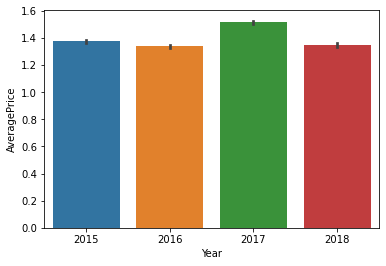

In [107]:
sns.barplot(x='Year',y='AveragePrice',data=data)

- There was an increase in average price of avocadoes in 2017

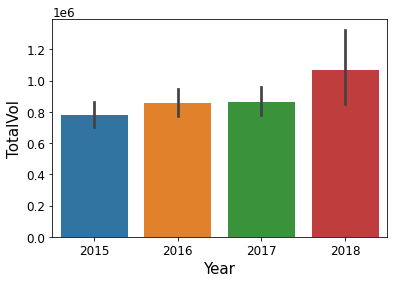

In [266]:
sns.barplot(x='Year',y='TotalVol',data=data)

- Total selling volume of avocados is increasing per year

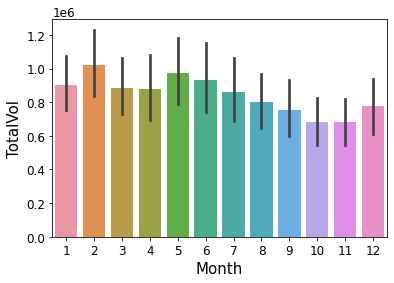

In [267]:
sns.barplot(x='Month',y='TotalVol',data=data)

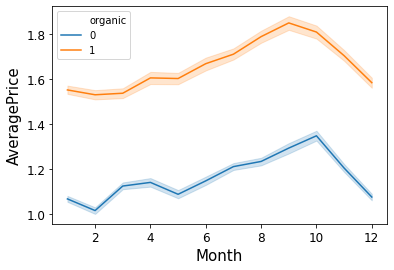

In [268]:
sns.lineplot(x='Month',y='AveragePrice',data=data,hue='organic')

- The above two graphs show that the sale of avocados decreases towards the end of the year as the average price increases during that period.

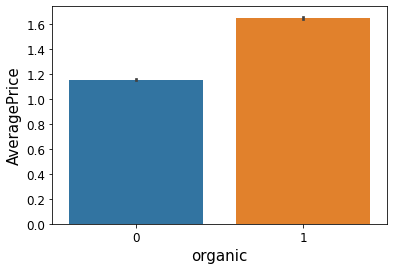

In [269]:
sns.barplot(x='organic',y='AveragePrice',data=data)

- 'organic' avocados tend to be more expensive than the 'conventional' ones.

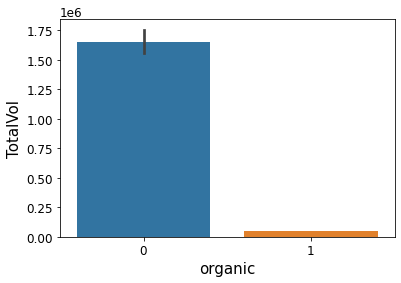

In [274]:
sns.barplot(y='TotalVol',x='organic',data=data)

- 'Conventional' avocados sale in lot more quantities than the 'Organic' ones.

In [279]:
df1 = pd.DataFrame(data.groupby('Year').mean())

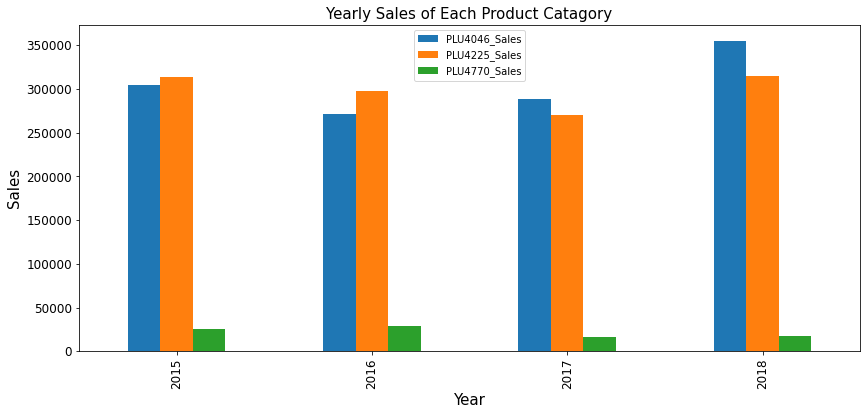

In [289]:
df1.loc[:, ['PLU4046_Sales', 'PLU4225_Sales', 'PLU4770_Sales']].plot(kind='bar', figsize=(14, 6))

plt.ylabel("Sales")
plt.title("Yearly Sales of Each Product Catagory")

plt.show()

- PLU4046 and PLU4225 sell more compared to PLU4770

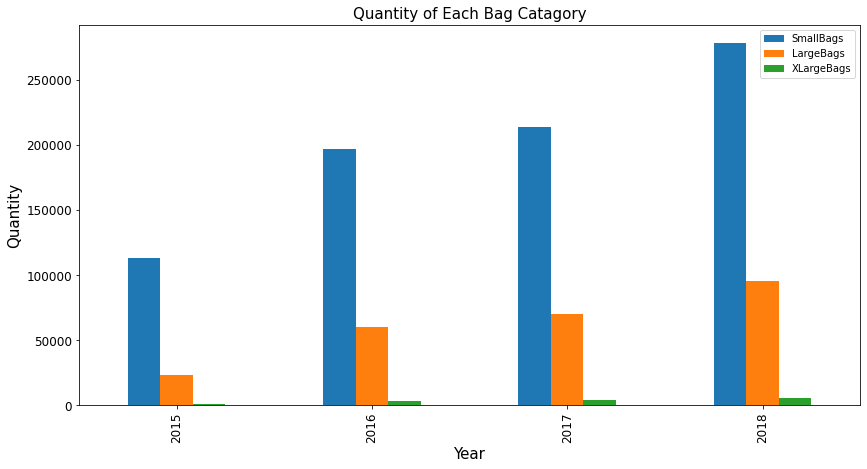

In [290]:
df1.loc[:, ['SmallBags', 'LargeBags', 'XLargeBags']].plot(kind='bar', figsize=(14, 7))

plt.ylabel("Quantity")
plt.title("Quantity of Each Bag Catagory")

plt.show()

- Small bags sell in way more quantities than Large and XLarge bags.

In [302]:
data['Region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

**Using 'Label Encoding' to convert 'Region' in numeric type**

In [303]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [304]:
data['Region']=le.fit_transform(data['Region'])

In [305]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AveragePrice   18249 non-null  float64
 1   TotalVol       18249 non-null  float64
 2   PLU4046_Sales  18249 non-null  float64
 3   PLU4225_Sales  18249 non-null  float64
 4   PLU4770_Sales  18249 non-null  float64
 5   TotalBags      18249 non-null  float64
 6   SmallBags      18249 non-null  float64
 7   LargeBags      18249 non-null  float64
 8   XLargeBags     18249 non-null  float64
 9   Year           18249 non-null  int64  
 10  Region         18249 non-null  int32  
 11  organic        18249 non-null  uint8  
 12  Day            18249 non-null  int64  
 13  Month          18249 non-null  int64  
dtypes: float64(9), int32(1), int64(3), uint8(1)
memory usage: 1.8 MB


**Now all of our data is numeric type**

### **Checking for skewness and outliers**

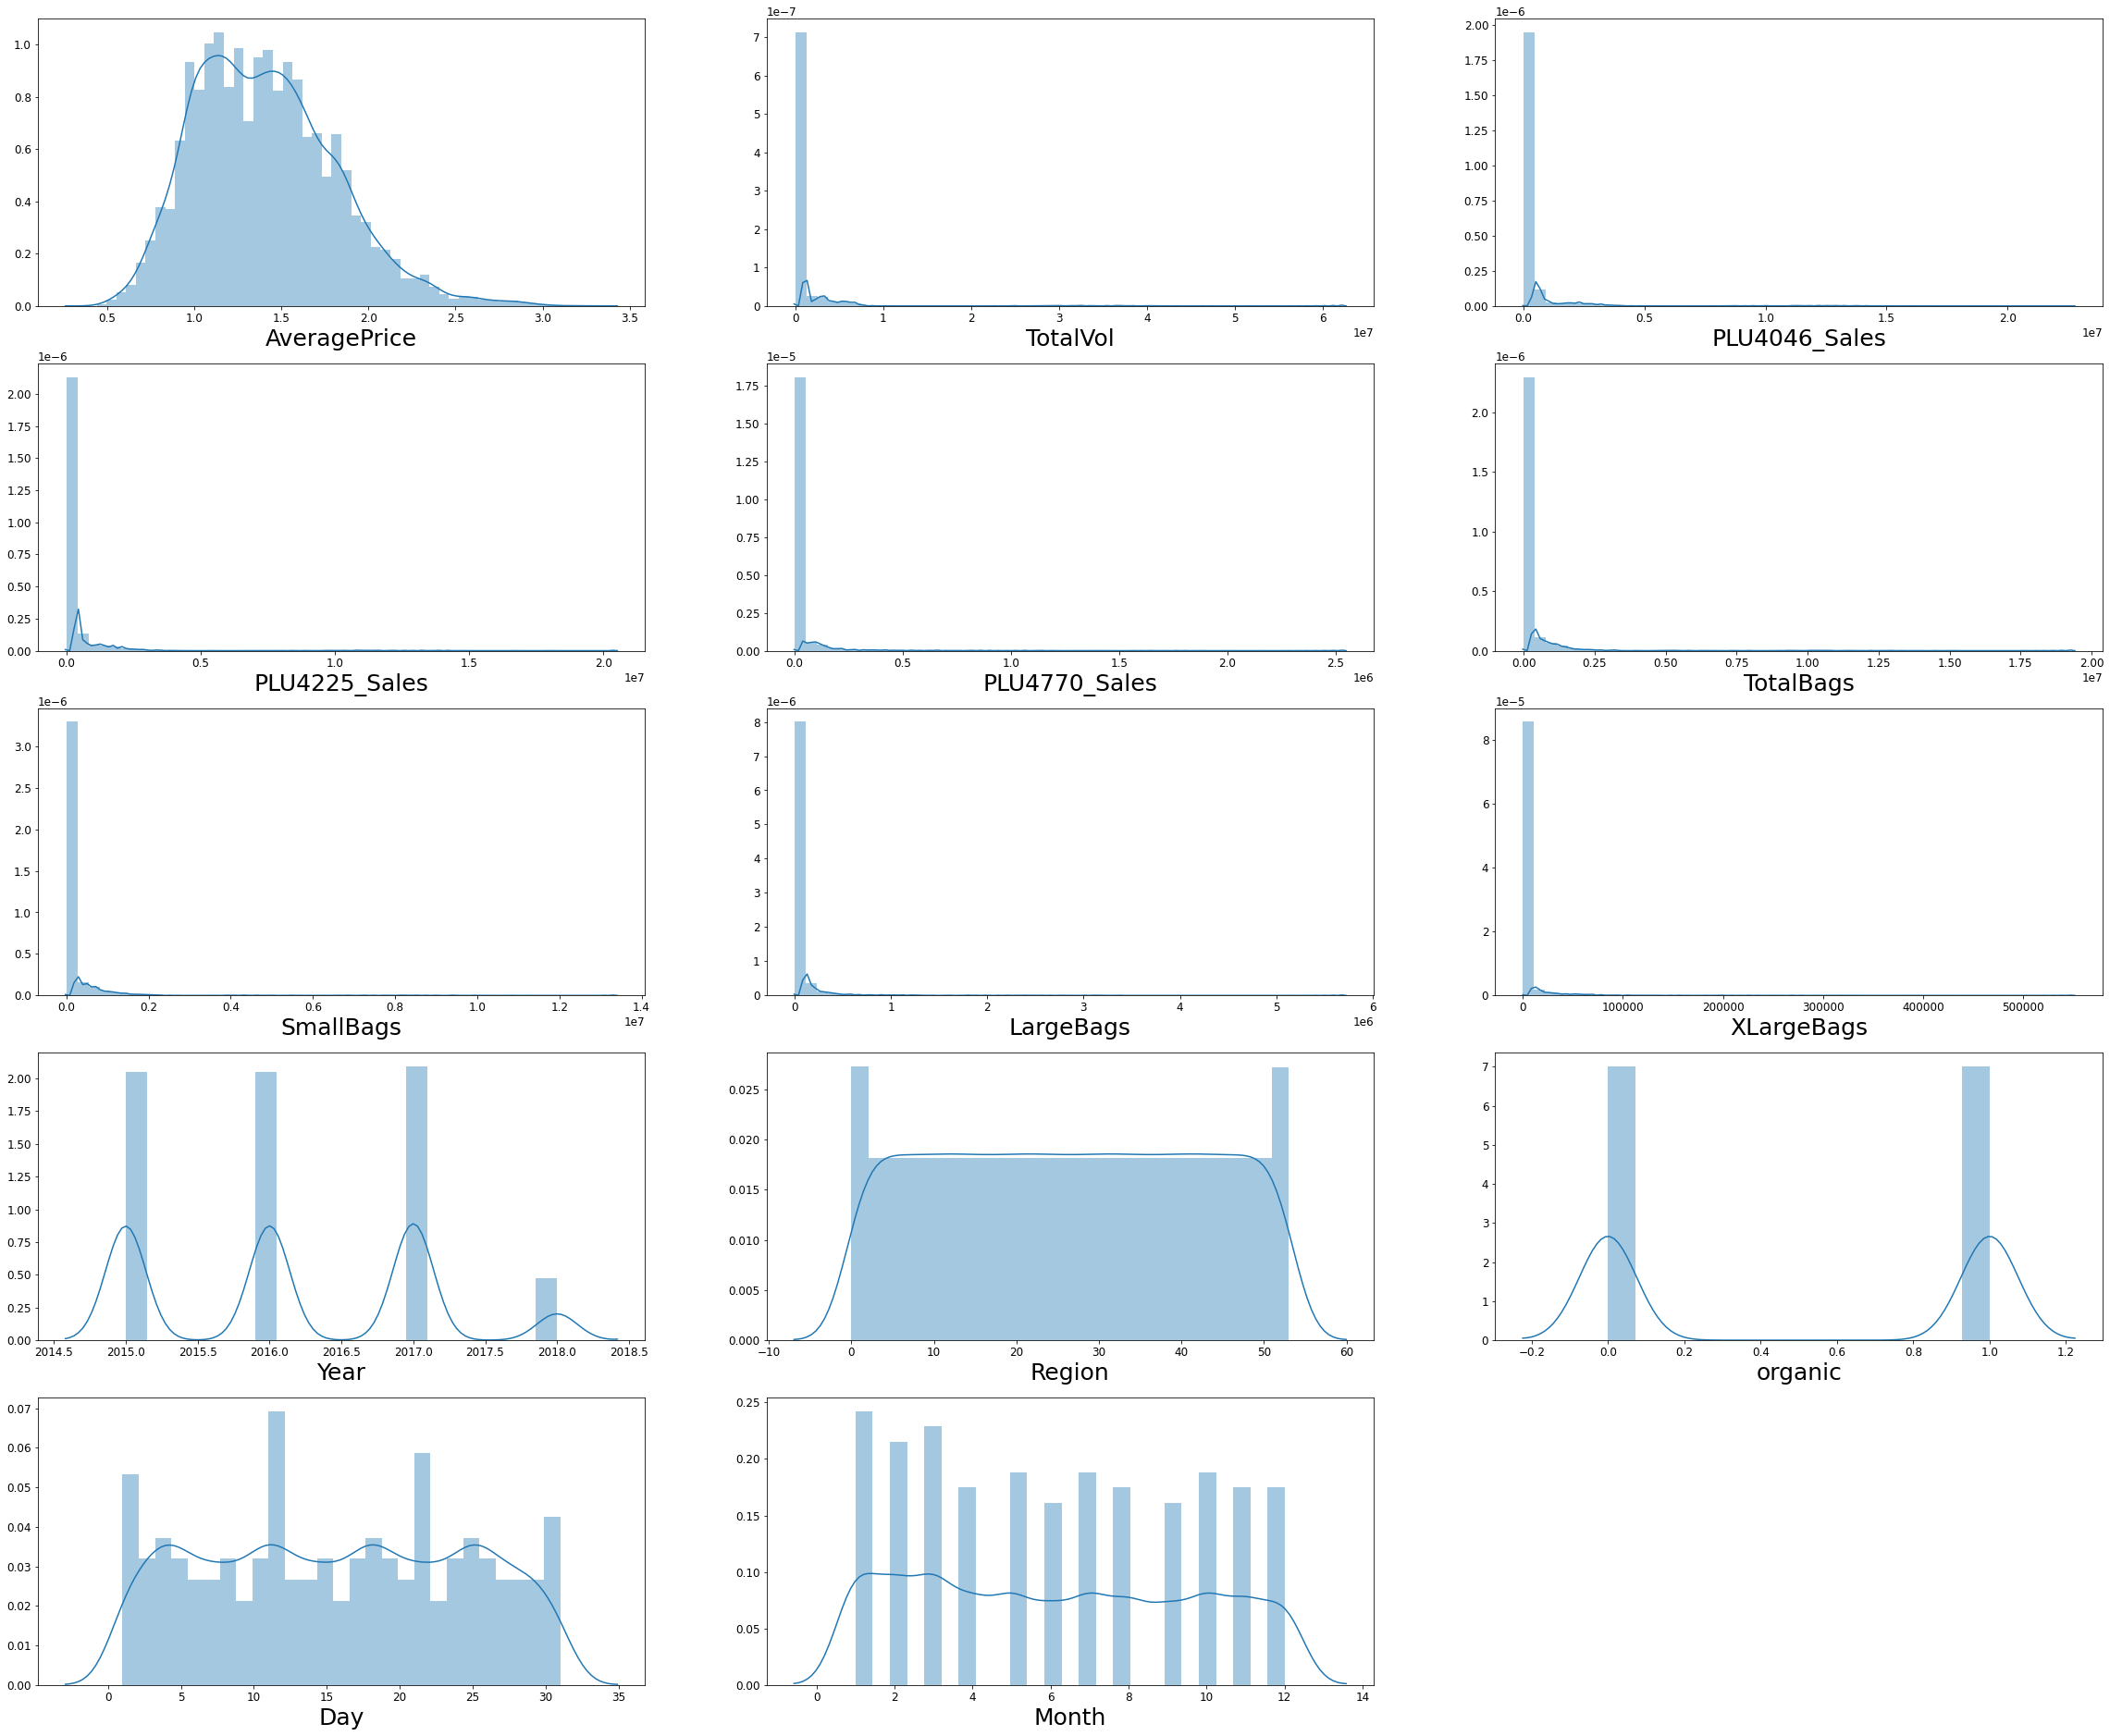

In [306]:
plt.figure(figsize=(40,40))
plot_number=1

for i in data:
    if plot_number<18:
        ax=plt.subplot(6,3,plot_number)
        sns.distplot(data[i])
        plt.xlabel(i,fontsize=25)
    plot_number+=1

In [307]:
data.skew()

AveragePrice      0.580303
TotalVol          9.007687
PLU4046_Sales     8.648220
PLU4225_Sales     8.942466
PLU4770_Sales    10.159396
TotalBags         9.756072
SmallBags         9.540660
LargeBags         9.796455
XLargeBags       13.139751
Year              0.215339
Region            0.000030
organic           0.000329
Day               0.014310
Month             0.106617
dtype: float64

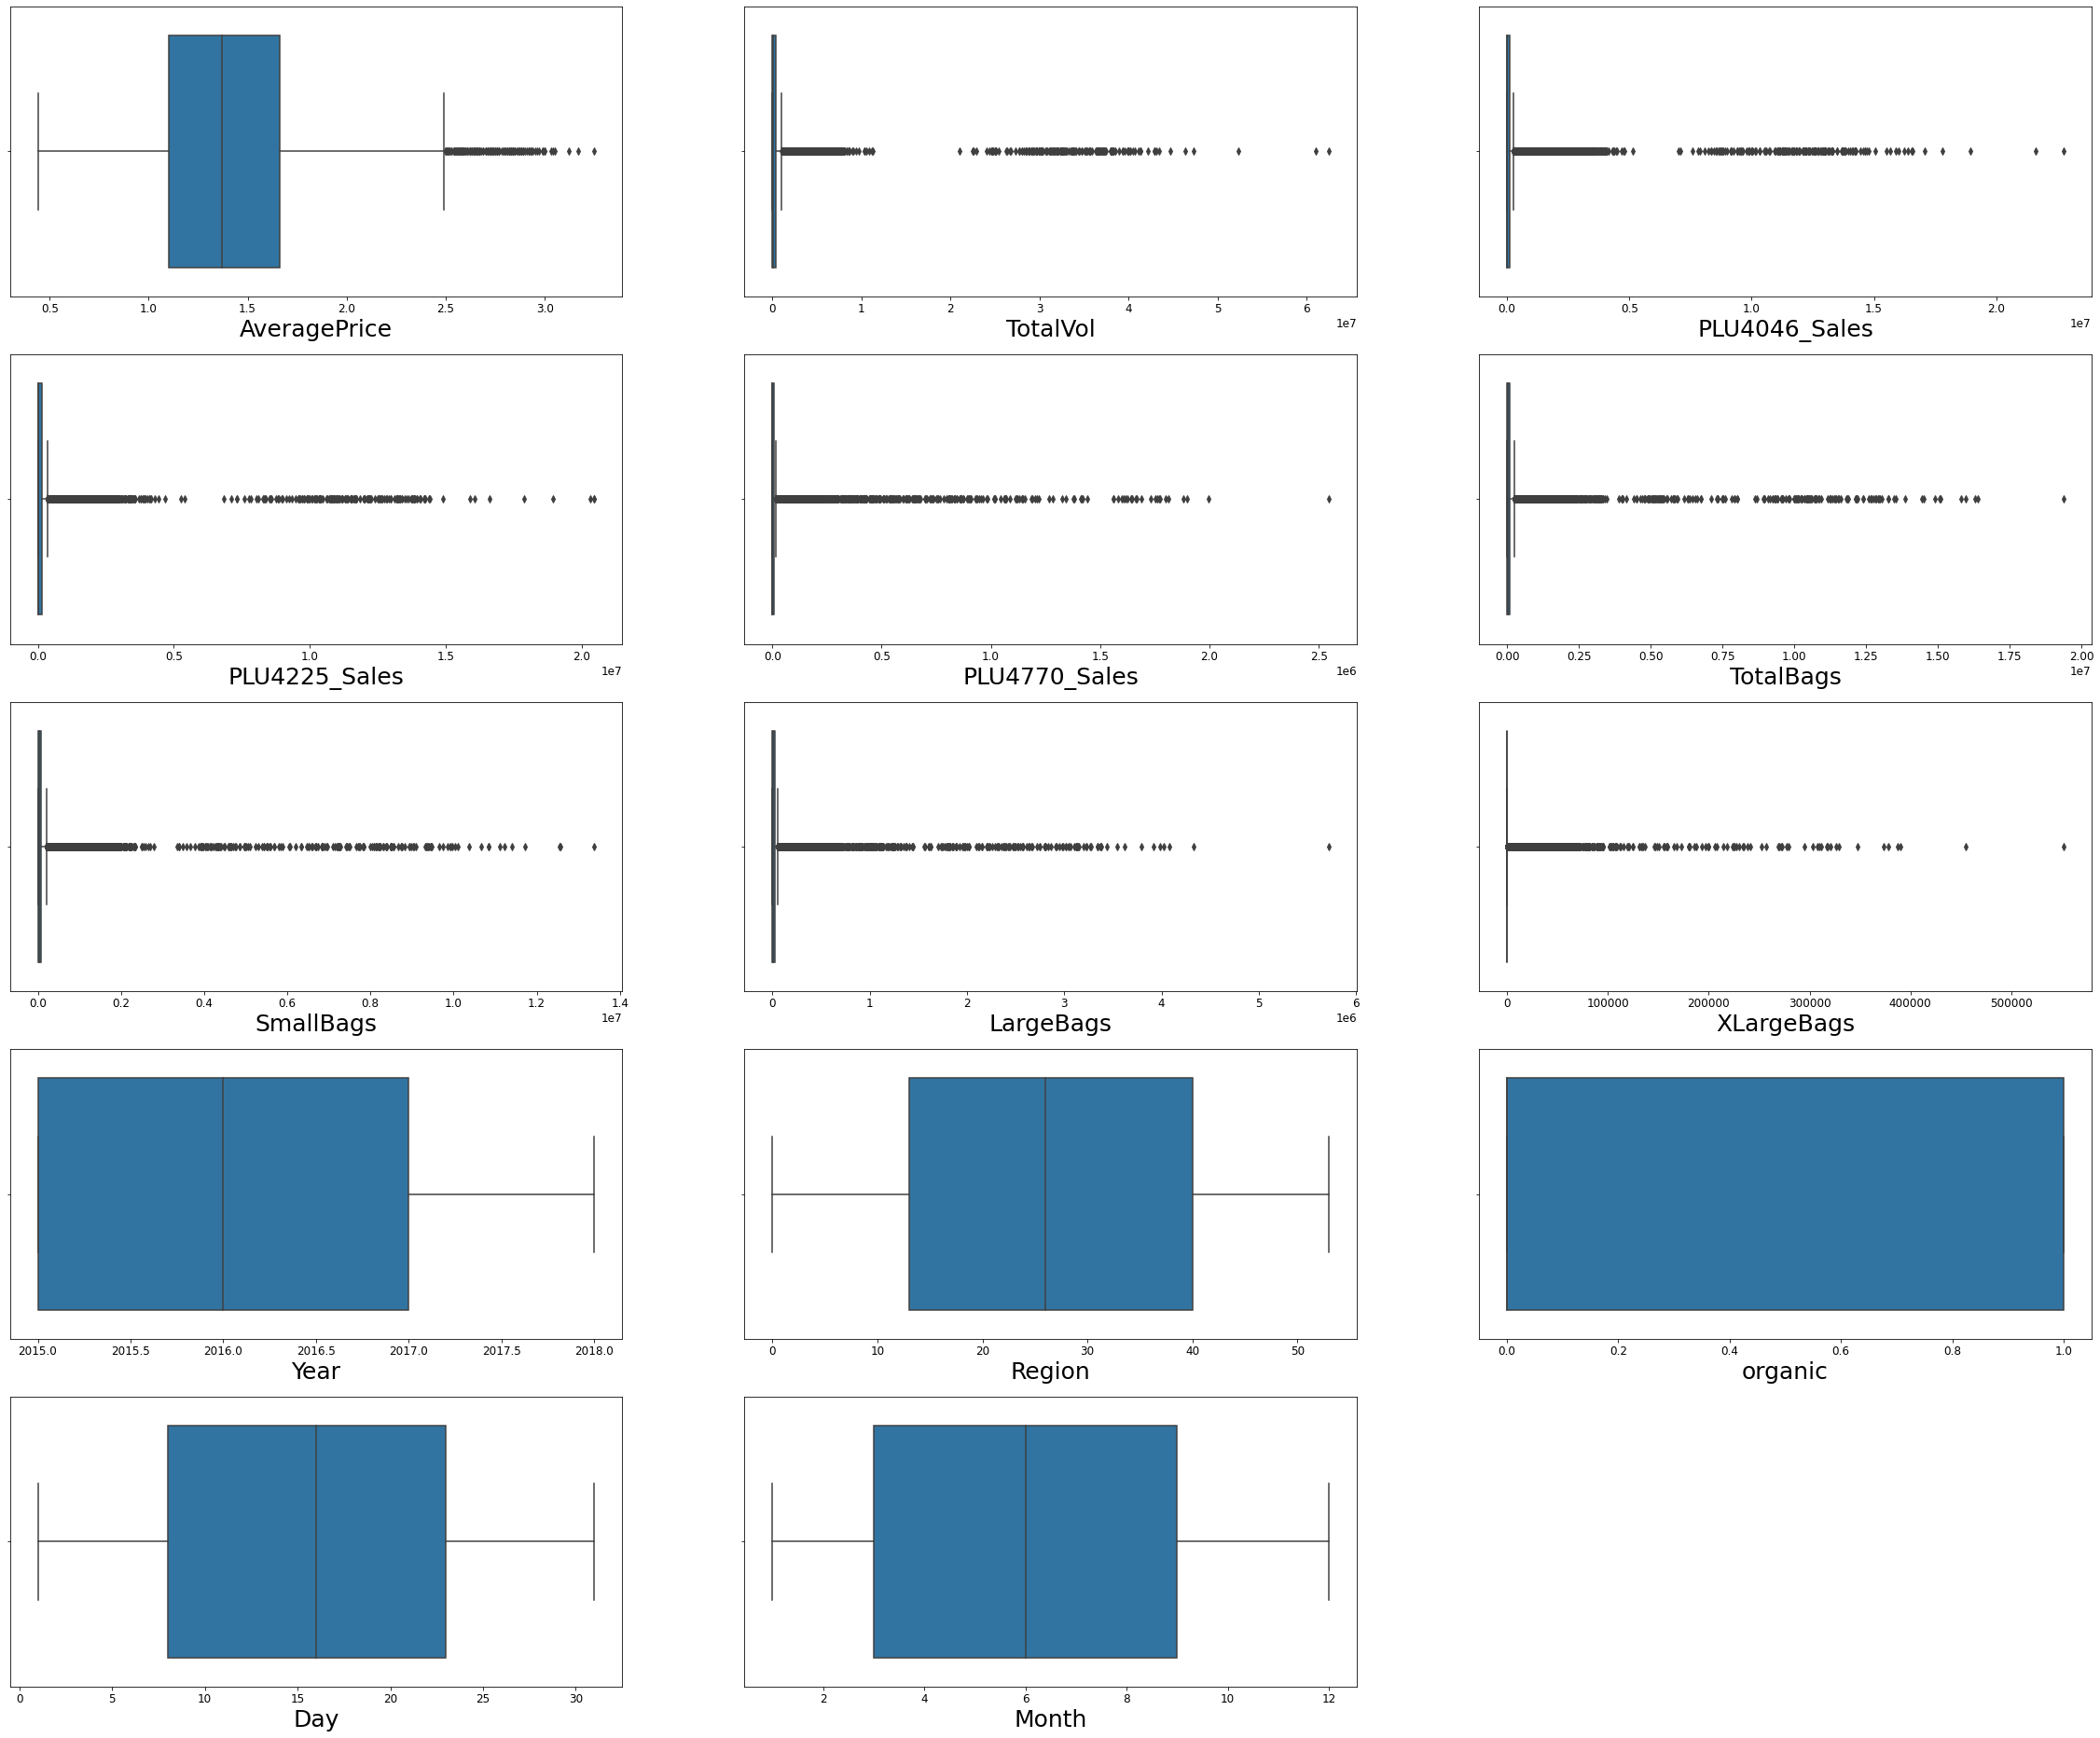

In [309]:
## Checking for outliers

plt.figure(figsize=(40,40))
plot_number=1

for i in data:
    if plot_number<18:
        ax=plt.subplot(6,3,plot_number)
        sns.boxplot(data[i])
        plt.xlabel(i,fontsize=25)
    plot_number+=1

In [311]:
# rejecting data beyond 3 std to manage skewness and outliers
from scipy.stats import zscore

z_score=zscore(data[['TotalVol', 'PLU4046_Sales', 'PLU4225_Sales',
       'PLU4770_Sales', 'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags']])
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<3).all(axis=1)
data1=data[filtering_entry]

data1.shape

(17782, 14)

In [312]:
data1.skew()

AveragePrice     0.560969
TotalVol         3.782060
PLU4046_Sales    4.928850
PLU4225_Sales    4.472729
PLU4770_Sales    5.137120
TotalBags        4.082103
SmallBags        4.238647
LargeBags        5.072468
XLargeBags       6.159391
Year             0.220792
Region           0.005773
organic         -0.052210
Day              0.011251
Month            0.098217
dtype: float64

In [315]:
for i in data[['TotalVol', 'PLU4046_Sales', 'PLU4225_Sales',
       'PLU4770_Sales', 'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags']]:
    if data1.skew().loc[i]>0.5:
        data1[i]=np.log1p(data1[i])
data1.skew()

AveragePrice     0.560969
TotalVol        -0.039041
PLU4046_Sales   -0.408827
PLU4225_Sales   -0.595360
PLU4770_Sales    0.079074
TotalBags       -0.394347
SmallBags       -0.782875
LargeBags       -0.603830
XLargeBags       1.225926
Year             0.220792
Region           0.005773
organic         -0.052210
Day              0.011251
Month            0.098217
dtype: float64

In [316]:
X=data1.drop('AveragePrice',axis=1)
y=data1['AveragePrice']

#### Now lets check the relationship between continuous features and target using pearson correlation coefficient

In [317]:
X.corrwith(y)

TotalVol        -0.576957
PLU4046_Sales   -0.531830
PLU4225_Sales   -0.429352
PLU4770_Sales   -0.492918
TotalBags       -0.567930
SmallBags       -0.479438
LargeBags       -0.463904
XLargeBags      -0.359220
Year             0.099910
Region           0.010428
organic          0.608447
Day              0.024742
Month            0.157900
dtype: float64

- Ignoring 'Year','Region','organic','Day','Month' here as they are catagorical.
- All continuous features show moderate relationship with the target

#### Now lets check the relationship between catagorical features and continuous target using ANOVA F-Values

In [318]:
cat_feat=data1[['Year','Region','organic','Day','Month']]

In [319]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [320]:
selectbest=SelectKBest(score_func=f_regression,k=4)
selectbest.fit(cat_feat,y)

SelectKBest(k=4, score_func=<function f_regression at 0x000002A14CC3CC10>)

In [321]:
scores_df=pd.DataFrame(selectbest.scores_)
column_df=pd.DataFrame(cat_feat.columns)

In [322]:
feature_scores=pd.concat([column_df,scores_df],axis=1) # Concating two DFs
feature_scores.columns=['Features','Scores'] # Naming the columns
feature_scores.nlargest(4,'Scores')

,Features,Scores
2,organic,10451.559014
4,Month,454.632786
0,Year,179.267941
3,Day,10.891048


- 'Day' shows weak relationship with the target hence we wil drop it along with 'XLargeBags'

In [323]:
X=X.drop(['Day','XLargeBags'],axis=1)

### Scaling the features

In [324]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [325]:
X_scaled=scaler.fit_transform(X)

### Splitting the data into training and testing sets

In [231]:
from sklearn.model_selection import train_test_split

In [326]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2)

### Importing regression performance metrics

In [329]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

## Model 1: KNN

In [337]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

In [338]:
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [339]:
y_knn=knn.predict(X_test)

In [340]:
knn_score=r2_score(y_test,y_knn)
knn_score

0.8828992991579998

In [341]:
knn_rmse=np.sqrt(mean_squared_error(y_test,y_knn))
knn_rmse           

0.13905262411903102

In [342]:
knn_rmae=np.sqrt(mean_absolute_error(y_test,y_knn))
knn_rmae           

0.31083968551775176

## Model 2: Random Forest

In [344]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [345]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [346]:
y_rf=rf.predict(X_test)

In [347]:
rf_score=r2_score(y_test,y_rf)
rf_score

0.8821902564242059

In [348]:
rf_rmse=np.sqrt(mean_squared_error(y_test,y_rf))
knn_rmse           

0.13905262411903102

In [349]:
rf_rmae=np.sqrt(mean_absolute_error(y_test,y_rf))
knn_rmae 

0.31083968551775176

## Model 3: Gradient Boosting

In [350]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()

In [365]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [366]:
y_gbr=gbr.predict(X_test)

In [367]:
gbr_score=r2_score(y_test,y_gbr)
gbr_score

0.7435417526300313

In [368]:
gbr_rmse=np.sqrt(mean_squared_error(y_test,y_gbr))
gbr_rmse           

0.20578218623308314

In [369]:
gbr_rmae=np.sqrt(mean_absolute_error(y_test,y_gbr))
gbr_rmae

0.3927689279495602

## Model 4: ADA Boost Regressor

In [356]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor()

In [357]:
abr.fit(X_train,y_train)

AdaBoostRegressor()

In [358]:
y_abr=abr.predict(X_test)

In [359]:
abr_score=r2_score(y_test,y_abr)
abr_score

0.5847668268996109

In [361]:
abr_rmse=np.sqrt(mean_squared_error(y_test,y_abr))
abr_rmse 

0.26184570999586654

In [364]:
abr_rmae=np.sqrt(mean_absolute_error(y_test,y_abr))
abr_rmae

0.46119718523431735

## Model 5: XG Boost Regressor

In [370]:
from xgboost import XGBRegressor
xgb=XGBRegressor()

In [371]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [372]:
y_xgb=xgb.predict(X_test)

In [373]:
xgb_score=r2_score(y_test,y_xgb)
xgb_score

0.8941422301999638

In [374]:
xgb_rmse=np.sqrt(mean_squared_error(y_test,y_xgb))
xgb_rmse

0.1322089365519279

In [375]:
xgb_rmae=np.sqrt(mean_absolute_error(y_test,y_xgb))
xgb_rmae

0.3080173224867883

## Model 6: Extra Tree Regressor

In [382]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()

In [383]:
etr.fit(X_train,y_train)

ExtraTreesRegressor()

In [384]:
y_etr=etr.predict(X_test)

In [385]:
etr_score=r2_score(y_test,y_etr)
etr_score

0.913457937277641

In [386]:
etr_rmse=np.sqrt(mean_squared_error(y_test,y_etr))
etr_rmse

0.1195399481293304

In [387]:
etr_rmae=np.sqrt(mean_absolute_error(y_test,y_etr))
etr_rmae

0.28291471608201313

**Storing all performance metrics in a single dataframe**

In [388]:
metrics=pd.DataFrame()
metrics['Model']=['KNN Regressor','RandomForest Regressor','GradientBoosting Regressor','ADABoost Regressor','XGB Regressor','ExtraTree Regressor']
metrics['R2 Score']=[knn_score,rf_score,gbr_score,abr_score,xgb_score,etr_score]
metrics['RMSE']=[knn_rmse,rf_rmse,gbr_rmse,abr_rmse,xgb_rmse,etr_rmse]
metrics['RMAE']=[knn_rmae,rf_rmae,gbr_rmae,abr_rmae,xgb_rmae,etr_rmae]

In [389]:
metrics.nlargest(6,'R2 Score')

,Model,R2 Score,RMSE,RMAE
5,ExtraTree Regressor,0.913458,0.119540,0.282915
4,XGB Regressor,0.894142,0.132209,0.308017
0,KNN Regressor,0.882899,0.139053,0.310840
1,RandomForest Regressor,0.882190,0.205782,0.392769
2,GradientBoosting Regressor,0.743542,0.205782,0.392769
3,ADABoost Regressor,0.584767,0.261846,0.461197


**Based on the above comparison of performance metrics, Extra Tree Regressor is our best model**

### Tuning the hyperparameters of our best model

In [395]:
from sklearn.model_selection import GridSearchCV

In [396]:
etr_grid={'n_estimators': [80,100],
          'criterion': ['mse', 'mae'],
          'min_samples_split': [1,2,3],
          'min_samples_leaf': [1,2,3],
          'max_leaf_nodes': [4,10,None]}

In [397]:
gridCV=GridSearchCV(etr,param_grid=etr_grid,n_jobs=-1)

In [398]:
gridCV.fit(X_train,y_train)

GridSearchCV(estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_leaf_nodes': [4, 10, None],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [80, 100]})

In [399]:
gridCV.best_params_

{'criterion': 'mae',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [400]:
etr_best=ExtraTreesRegressor(criterion='mae',max_leaf_nodes=None,min_samples_leaf=1,min_samples_split=2,n_estimators=100)

In [401]:
etr_best.fit(X_train,y_train)

ExtraTreesRegressor(criterion='mae')

In [402]:
y_best=etr_best.predict(X_test)

In [403]:
best_score=r2_score(y_test,y_best)
best_score

0.9133108652776569

In [404]:
best_rmse=np.sqrt(mean_squared_error(y_test,y_best))
best_rmse

0.11964147977553118

In [405]:
best_rmae=np.sqrt(mean_absolute_error(y_test,y_best))
best_rmae

0.28270998699099326

Text(0.5, 1.0, 'Actual vs Predicted')

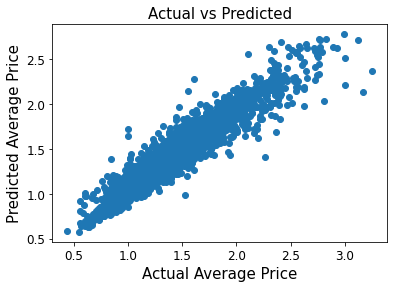

In [406]:
parameters = {'ytick.labelsize': 12,
          'xtick.labelsize': 12,'axes.labelsize': 15,
          'axes.titlesize': 15}
plt.rcParams.update(parameters)



plt.scatter(y_test,y_best)
plt.xlabel('Actual Average Price')
plt.ylabel('Predicted Average Price')
plt.title('Actual vs Predicted')

### Saving Our Best Model

In [408]:
import pickle
filename='Avocado_Price_ETR.pkl'
pickle.dump(etr_best,open(filename,'wb'))